# Kaggle Regression

# House Pricing

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import modulo_limpieza
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sys
pd.set_option('display.max_columns', 500)

## Import Data

In [2]:
data = pd.read_csv('train.csv')

## Data Structure

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

_The data has 81 columns, with SalePrice as the target._

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Null Data

In [6]:
pd.DataFrame(data.isnull().sum() / data.shape[0] * 100) 

,0
Id,0.000000
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,17.739726
LotArea,0.000000
Street,0.000000
Alley,93.767123
LotShape,0.000000
LandContour,0.000000
Utilities,0.000000


_As seen above, Alley, FireplaceQu, PoolQC, Fence, MiscFeature have more than 40% of null data, these features will be eliminated._

In [7]:
data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)

In [8]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


## Columns Names

In [9]:
continuous = ['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
             '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
              '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice']
discrete = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
              'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
              'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
           'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
            'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars',
           'GarageQual', 'GarageCond', 'PavedDrive', 'YrSold', 'SaleType', 'SaleCondition', 'LandContour']

In [10]:
# rename columns
new_cont = modulo_limpieza.renombrar_variables(continuous, 'continua')
new_disc = modulo_limpieza.renombrar_variables(discrete, 'discreta')

data.rename(columns = new_cont, inplace = True)
data.rename(columns = new_disc, inplace = True)

## Data Dummy

In [11]:
# columns names
dummies = data.select_dtypes(include=['object']).columns

#dummies
data = pd.get_dummies(data, columns=dummies, drop_first=True)

## Outliers

In [12]:
IQR = modulo_limpieza.IQR(data.filter(like = 'c_'))
Percentil = modulo_limpieza.percentiles(data.filter(like = 'c_'))
Z_score = modulo_limpieza.z_score(data, columns = data.filter(like = 'c_').columns)

C:\Users\olver\Desktop\kaggle_house-main\kaggle_house-main\modulo_limpieza.py:302: RuntimeWarning:

invalid value encountered in greater



In [13]:
df_out = modulo_limpieza.tabla_out(IQR[1], Percentil[1], Z_score[1], IQR[0], Percentil[0], Z_score[0], data)
df_out

,features,n outliers IQR,n outliers Percentil,n outliers Z-Score,n outliers IQR %,n outliers Percentil %,n outliers Z-Score %,total outliers,% outliers,indices
0,c_Id,0,803,0,0.000000,55.000000,0.000000,0,0.000000,[]
1,c_LotFrontage,88,648,0,6.027397,44.383562,0.000000,88,6.027397,"[1029, 523, 1038, 1039, 36, 1061, 41, 56, 1088..."
2,c_LotArea,69,803,13,4.726027,55.000000,0.890411,69,4.726027,"[384, 769, 1409, 260, 1287, 523, 271, 1039, 52..."
3,c_MasVnrArea,96,70,0,6.575342,4.794521,0.000000,70,4.794521,"[640, 769, 898, 517, 1287, 1289, 1417, 523, 52..."
4,c_BsmtFinSF1,7,801,6,0.479452,54.863014,0.410959,7,0.479452,"[898, 70, 523, 178, 1298, 53, 1182]"
5,c_BsmtFinSF2,167,73,50,11.438356,5.000000,3.424658,73,5.000000,"[1024, 1025, 1152, 260, 263, 649, 1418, 271, 1..."
6,c_BsmtUnfSF,29,802,11,1.986301,54.931507,0.753425,29,1.986301,"[768, 774, 137, 1166, 22, 278, 1046, 798, 928,..."
7,c_TotalBsmtSF,61,802,10,4.178082,54.931507,0.684932,61,4.178082,"[897, 898, 259, 1412, 646, 392, 520, 778, 523,..."
8,c_1stFlrSF,20,803,12,1.369863,55.000000,0.821918,20,1.369863,"[1024, 898, 523, 529, 1298, 1044, 1182, 175, 1..."
9,c_2ndFlrSF,2,73,4,0.136986,5.000000,0.273973,4,0.273973,"[304, 1169, 691, 1182]"


_The outliers will be eliminated from the table, this will help to create a better statistical model._ 

In [14]:
# number of element to eliminate
aux_elementos = []

#iteration by indez
for variable in range(df_out.shape[0]):
    # auxiliar list for delete elements
    lista_auxiliar = list(set(df_out['indices'][variable]) & set(data.index))
    # drop data
    data.drop(lista_auxiliar, inplace = True)
    aux_elementos.append(data.shape[0])

In [15]:
pd.Series(index = df_out['features'], data = aux_elementos)

features
c_Id               1460
c_LotFrontage      1372
c_LotArea          1321
c_MasVnrArea       1264
c_BsmtFinSF1       1264
c_BsmtFinSF2       1205
c_BsmtUnfSF        1182
c_TotalBsmtSF      1142
c_1stFlrSF         1141
c_2ndFlrSF         1141
c_GrLivArea        1130
c_GarageYrBlt      1130
c_GarageArea       1125
c_WoodDeckSF       1109
c_OpenPorchSF      1059
c_EnclosedPorch    1005
c_3SsnPorch         987
c_ScreenPorch       942
c_PoolArea          940
c_MiscVal           910
c_MoSold            910
c_SalePrice         891
dtype: int64

_This process drop 39% of the data, this must be helpfull to the model._

## Fill NA

In [16]:
data.isnull().sum()[data.isnull().sum() > 0].index

Index(['c_LotFrontage', 'c_MasVnrArea', 'c_GarageYrBlt'], dtype='object')

In [17]:
nulls_c = ['c_LotFrontage', 'c_MasVnrArea', 'c_GarageYrBlt']

In [18]:
#filling na continuous
for feat_c in nulls_c:
    data[feat_c].fillna(data[feat_c].median, inplace = True) 

In [19]:
data.isnull().sum().values.sum()

0

## Feature Selection

### Low Correlation with Target

In [20]:
data.corr()['c_SalePrice'][np.abs(data.corr()['c_SalePrice']) < 0.02]

c_Id                     -0.011334
c_ScreenPorch             0.013644
v_YrSold                 -0.006653
v_LotShape_IR3            0.016095
v_LotConfig_FR2           0.006165
v_LotConfig_FR3           0.006997
v_Neighborhood_NPkVill   -0.013513
v_Condition1_RRNe         0.012464
v_Condition2_RRAn        -0.017624
v_HouseStyle_2.5Fin       0.007959
v_RoofStyle_Mansard      -0.011368
v_RoofMatl_CompShg        0.013104
v_RoofMatl_Tar&Grv       -0.016997
v_RoofMatl_WdShngl        0.001352
v_Exterior2nd_AsphShn    -0.007860
v_Exterior2nd_BrkFace     0.006808
v_Exterior2nd_ImStucc    -0.009113
v_Exterior2nd_Stone       0.006457
v_BsmtFinType2_LwQ       -0.015586
v_GarageQual_Gd           0.012284
Name: c_SalePrice, dtype: float64

In [21]:
low_corr = data.corr()['c_SalePrice'][np.abs(data.corr()['c_SalePrice']) < 0.02].index

_As showed above, c_ScreenPorc, v_YrSold have low correlation with the targer this will be drop from de data table._

In [22]:
data.drop(columns = low_corr, axis = 1, inplace = True)

### High Correlation between other Features

In [23]:
#original features
orig_feat = data.iloc[:, 1:-1].columns

#original columns
ori_col = data.iloc[:, 1:-1].corr().columns

#iteration
for index in ori_col:
    if index in data.columns[1:-1]:
        #corr table
        corr_t = np.abs(data.iloc[:, 1:-1].corr())
        #iteration in features
        for feat in corr_t.loc[:, index][corr_t.loc[:, index] > 0.5].index:
            if feat != index and feat != 'c_SalePrice':
                data.drop(labels=feat, axis = 1, inplace=True)

In [24]:
for i in orig_feat:
    if i not in data.columns:
        print(i)

v_OverallQual
v_YearBuilt
v_YearRemodAdd
c_BsmtUnfSF
c_TotalBsmtSF
c_1stFlrSF
c_GrLivArea
v_BsmtFullBath
v_FullBath
v_HalfBath
v_TotRmsAbvGrd
v_GarageCars
c_GarageArea
v_MSZoning_RM
v_LandContour_Lvl
v_Neighborhood_Somerst
v_Condition1_Norm
v_Condition2_Norm
v_BldgType_Duplex
v_HouseStyle_1Story
v_HouseStyle_2Story
v_RoofStyle_Hip
v_Exterior2nd_Brk Cmn
v_Exterior2nd_CmentBd
v_Exterior2nd_HdBoard
v_Exterior2nd_MetalSd
v_Exterior2nd_Plywood
v_Exterior2nd_Stucco
v_Exterior2nd_VinylSd
v_Exterior2nd_Wd Sdng
v_Exterior2nd_Wd Shng
v_MasVnrType_None
v_ExterQual_Gd
v_ExterQual_TA
v_ExterCond_TA
v_Foundation_PConc
v_BsmtQual_TA
v_BsmtCond_TA
v_BsmtFinType1_Unf
v_BsmtFinType2_Unf
v_Heating_GasW
v_Heating_Grav
v_Electrical_Mix
v_KitchenQual_Gd
v_KitchenQual_TA
v_Functional_Typ
v_GarageType_Detchd
v_GarageFinish_Unf
v_GarageQual_TA
v_GarageCond_Po
v_PavedDrive_Y
v_SaleType_WD
v_SaleCondition_Normal


### High Correlation between the Target

In [40]:
var_1 = data[data['v_BsmtFinType1_GLQ'] == 1]['c_SalePrice']
var_0 = data[data['v_BsmtFinType1_GLQ'] == 0]['c_SalePrice']

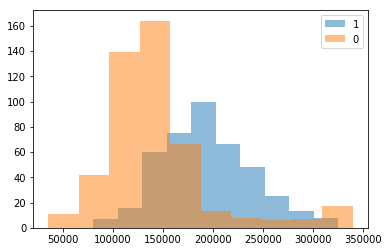

In [59]:
plt.hist(var_1, alpha = .5)
plt.hist(var_0, alpha = .5)
plt.legend([1,0])

In [52]:
var_1 = data[data['v_BsmtQual_Gd'] == 1]['c_SalePrice']
var_0 = data[data['v_BsmtQual_Gd'] == 0]['c_SalePrice']

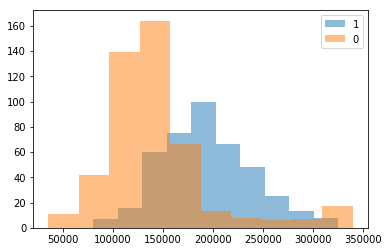

In [58]:
plt.hist(var_1, alpha = .5)
plt.hist(var_0, alpha = .5)
plt.legend([1,0])

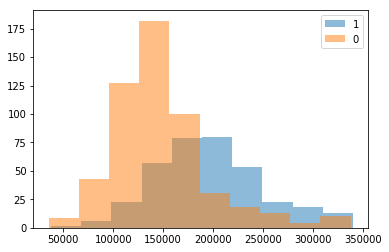

In [60]:
var_1 = data[data['v_Exterior1st_VinylSd'] == 1]['c_SalePrice']
var_0 = data[data['v_Exterior1st_VinylSd'] == 0]['c_SalePrice']

plt.hist(var_1, alpha = .5)
plt.hist(var_0, alpha = .5)
plt.legend([1,0])

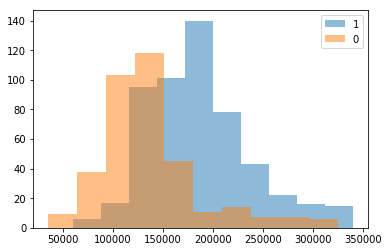

In [61]:
var_1 = data[data['v_GarageType_Attchd'] == 1]['c_SalePrice']
var_0 = data[data['v_GarageType_Attchd'] == 0]['c_SalePrice']

plt.hist(var_1, alpha = .5)
plt.hist(var_0, alpha = .5)
plt.legend([1,0])

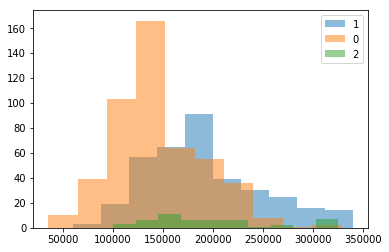

In [64]:
var_1 = data[data['v_Fireplaces'] == 1]['c_SalePrice']
var_0 = data[data['v_Fireplaces'] == 0]['c_SalePrice']
var_2 = data[data['v_Fireplaces'] == 2]['c_SalePrice']

plt.hist(var_1, alpha = .5)
plt.hist(var_0, alpha = .5)
plt.hist(var_2, alpha = .5)
plt.legend([1, 0, 2])

In [32]:
np.abs(data.corr()['c_SalePrice']).sort_values(ascending = False)[1:6]

v_BsmtFinType1_GLQ       0.469933
v_BsmtQual_Gd            0.452567
v_Exterior1st_VinylSd    0.429763
v_GarageType_Attchd      0.421282
v_Fireplaces             0.394269
Name: c_SalePrice, dtype: float64

## PCA

In [ ]:
from sklearn.decomposition._online_lda

## Modelo

In [94]:
y = data['c_SalePrice']
X = data.drop('c_SalePrice', axis = 1)

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [92]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

TypeError: float() argument must be a string or a number, not 'method'

In [98]:
X_train.astype('float64')

TypeError: float() argument must be a string or a number, not 'method'